<font size=6><b>Lec02. iris DL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings(action='ignore')
sns.set()


In [2]:
np.random.seed(1234)

import tensorflow as tf
tf.random.set_seed(1234)



In [3]:
dataset = load_iris()
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
df.columns = ['sl', 'sw', 'pl','pw', 'target']
df.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# X y 분리

In [4]:
y = df['target']
X = df.drop(['target'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split

# 방법1) sparse loss

* <font color=red><b>y의 값이 정수형(Label encoding)인 경우  --> y_traget = [1,2,2,1,3,2] </b></font>
* model.add(Dense(3, activation="softmax"))  
* model.compile(..., <font color=red><b>loss='sparse_categorical_crossentropy'</b></font>)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


## train test 분리

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                  random_state=1234,  
                                                  stratify=df['target'],
                                                  shuffle=True)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape )

(120, 4) (30, 4) (120,) (30,)


## 모델

In [8]:
model_s = Sequential()
model_s.add(Dense(units=10,  activation='relu',  input_dim=4))   #--------------- input_dim == 피쳐갯수
model_s.add(Dense(units=16,  activation='relu')) 
model_s.add(Dense(units=24,  activation='relu')) 
model_s.add(Dense(units=8,  activation='relu')) 
model_s.add(Dense(units=3 , activation='softmax'))              #--------------- 멀티분류

model_s.compile(optimizer='adam',            
            loss='sparse_categorical_crossentropy',    #------ 손실값 *********************
            metrics=['accuracy'])       
print(model_s.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 16)                176       
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 8)                 200       
                                                                 
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________
None


## 평가 검증

In [9]:
fit_res = model_s.fit(X_train, y_train 
                  #, batch_size=15
                  , epochs=50
                  , validation_data=(X_val, y_val)
                 )

loss, acc = model_s.evaluate(X_val, y_val)
print(f"loss: {loss}  accuracy : {acc}")

Epoch 1/50
4/4 [==============================] - 1s 108ms/step - loss: 1.1053 - accuracy: 0.3333 - val_loss: 1.0884 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 1.0765 - accuracy: 0.4667 - val_loss: 1.0616 - val_accuracy: 0.6667
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 1.0514 - accuracy: 0.6667 - val_loss: 1.0345 - val_accuracy: 0.6667
Epoch 4/50
4/4 [==============================] - 0s 19ms/step - loss: 1.0259 - accuracy: 0.4917 - val_loss: 1.0242 - val_accuracy: 0.4333
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 1.0066 - accuracy: 0.5583 - val_loss: 1.0055 - val_accuracy: 0.6667
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.9891 - accuracy: 0.6667 - val_loss: 0.9872 - val_accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 0s 19ms/step - loss: 0.9711 - accuracy: 0.6667 - val_loss: 0.9673 - val_accuracy: 0.6667
Epoch 8/50
4/4 [==========

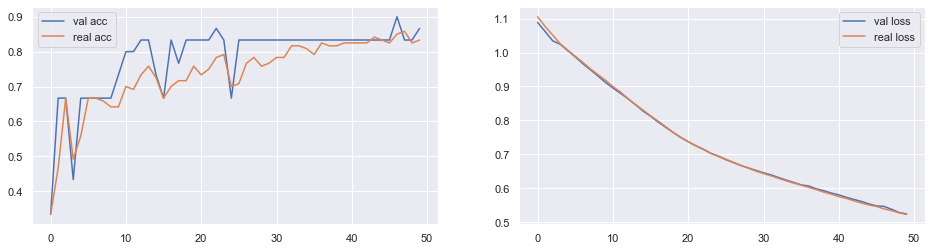

In [10]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
vloss = fit_res.history["val_accuracy"]
loss = fit_res.history["accuracy"]
plt.plot(range(50),vloss , label="val acc")
plt.plot(range(50),loss  , label="real acc")
plt.legend()

plt.subplot(1,2,2)
vloss = fit_res.history["val_loss"]
loss = fit_res.history["loss"]
plt.plot(range(50),vloss , label="val loss")
plt.plot(range(50),loss  , label="real loss")
plt.legend()
plt.show()

# 방법2) categorical  loss

* ont color=red><b> labels are given as a one_hot representation. eg., When labels values are [2, 0, 1], y_true = [[0, 0, 1], [1, 0, 0], [0, 1, 0]].

* <font color=red><b> y의 값이 one hot encoding인 경우  ---> y_true = [[0, 0, 1], [1, 0, 0], [0, 1, 0]] </b></font>
* model.add(Dense(3, activation="softmax"))  
* model.compile(..., <font color=red><b>loss='categorical_crossentropy'</b></font>)

## y 인코딩 ★★★

* keras.utils.to_categorical(y)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_encoding = to_categorical(y)
y_encoding[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

* pandas.get_dummies(y)

In [13]:
y_en = pd.get_dummies(y)
y_en[:2]

,0,1,2
0,1,0,0
1,1,0,0


## train test 분리

In [14]:
X_train, X_val, y_train_encoding, y_val_encoding = train_test_split(X, y_encoding,  #---***주의
                                                 test_size=0.2, 
                                                  random_state=1234,  
                                                  stratify=df['target'],
                                                  shuffle=True)
print(X_train.shape, X_val.shape, y_train_encoding.shape, y_val_encoding.shape )

(120, 4) (30, 4) (120, 3) (30, 3)


In [15]:
y_train_encoding[:3]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

## 모델

In [16]:
model_c = Sequential()
model_c.add(Dense(units=10,  activation='relu',  input_dim=4))   #--------------- input_dim == 피쳐갯수
model_c.add(Dense(units=16,  activation='relu')) 
model_c.add(Dense(units=24,  activation='relu')) 
model_c.add(Dense(units=8,  activation='relu'))
model_c.add(Dense(units=3 , activation='softmax'))              #--------------- 멀티분류

model_c.compile(optimizer='adam',              
            loss='categorical_crossentropy',    #------손실값:주의주의주의주의
            metrics=['accuracy'])              
print(model_c.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                50        
                                                                 
 dense_6 (Dense)             (None, 16)                176       
                                                                 
 dense_7 (Dense)             (None, 24)                408       
                                                                 
 dense_8 (Dense)             (None, 8)                 200       
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________
None


## 평가 검증

In [17]:
fit_res = model_c.fit(X_train, y_train_encoding 
                  #, batch_size=15
                  , epochs=50
                  , validation_data=(X_val, y_val_encoding)
                 )

loss, acc = model_c.evaluate(X_val, y_val_encoding)
print(f"loss: {loss}  accuracy : {acc}")

Epoch 1/50
4/4 [==============================] - 1s 79ms/step - loss: 1.1144 - accuracy: 0.3333 - val_loss: 1.0752 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 1.0658 - accuracy: 0.3333 - val_loss: 1.0426 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 1.0376 - accuracy: 0.3333 - val_loss: 1.0123 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 1.0046 - accuracy: 0.3333 - val_loss: 0.9860 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 0.9791 - accuracy: 0.3333 - val_loss: 0.9624 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 0.9585 - accuracy: 0.3333 - val_loss: 0.9445 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.9406 - accuracy: 0.3333 - val_loss: 0.9267 - val_accuracy: 0.3333
Epoch 8/50
4/4 [===========

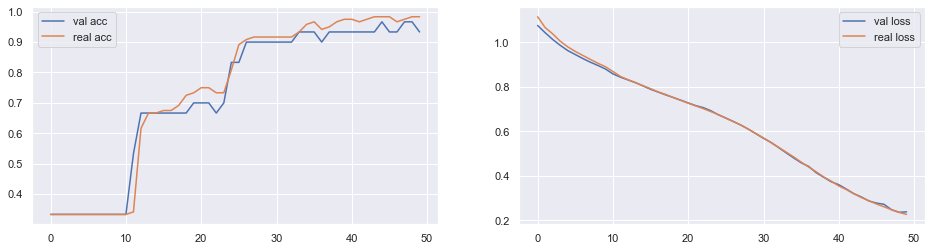

In [18]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
vloss = fit_res.history["val_accuracy"]
loss = fit_res.history["accuracy"]
plt.plot(range(50),vloss , label="val acc")
plt.plot(range(50),loss  , label="real acc")
plt.legend()

plt.subplot(1,2,2)
vloss = fit_res.history["val_loss"]
loss = fit_res.history["loss"]
plt.plot(range(50),vloss , label="val loss")
plt.plot(range(50),loss  , label="real loss")
plt.legend()
plt.show()